# Análisis del Dataset Titanic
**Proyecto de Programación II - Ciencia de Datos**

## Objetivo
Realizar un análisis exploratorio completo del dataset Titanic utilizando Pandas

## 1. Carga de Datos


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


In [3]:
train = pd.read_csv('../data:/train.csv')
test = pd.read_csv('../data:/test.csv')

print("Datos cargados exitosamente")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Datos cargados exitosamente
Train shape: (891, 12)
Test shape: (418, 11)


## 2. Descripción de Variables



In [12]:
print("COLUMNAS EN TRAIN:")
print(train.columns.tolist())
print("\nCOLUMNAS EN TEST:")
print(test.columns.tolist())

COLUMNAS EN TRAIN:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

COLUMNAS EN TEST:
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [13]:
print("PRIMERAS FILAS - TRAIN:")
train.head()

PRIMERAS FILAS - TRAIN:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
print("INFORMACION DEL DATASET:")
train.info()

INFORMACION DEL DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Descripción de Variables:

- **PassengerId**: Identificador único del pasajero (int)
- **Survived**: Variable objetivo - 0=No sobrevivió, 1=Sobrevivió (solo en train)
- **Pclass**: Clase del ticket (1=Primera, 2=Segunda, 3=Tercera)
- **Name**: Nombre completo del pasajero (incluye título)
- **Sex**: Sexo del pasajero (male/female)
- **Age**: Edad en años (puede tener valores faltantes)
- **SibSp**: Número de hermanos/cónyuges a bordo
- **Parch**: Número de padres/hijos a bordo
- **Ticket**: Número del ticket
- **Fare**: Tarifa pagada en libras esterlinas
- **Cabin**: Número de cabina (muchos valores faltantes)
- **Embarked**: Puerto de embarque (C=Cherbourg, Q=Queenstown, S=Southampton)

## 3. Estadísticas Básicas

In [15]:
print("ESTADISTICAS DESCRIPTIVAS - TRAIN:")
train.describe()

ESTADISTICAS DESCRIPTIVAS - TRAIN:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
print("ESTADISTICAS DESCRIPTIVAS - TEST:")
test.describe()

ESTADISTICAS DESCRIPTIVAS - TEST:


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [17]:
comparacion = pd.DataFrame({
    'Train': train.describe().loc['mean'],
    'Test': test.describe().loc['mean']
})
comparacion['Diferencia %'] = ((comparacion['Test'] - comparacion['Train']) / comparacion['Train'] * 100).round(2)
print("COMPARACION TRAIN VS TEST (Medias):")
comparacion

COMPARACION TRAIN VS TEST (Medias):


,Train,Test,Diferencia %
Age,29.699118,30.272590,1.93
Fare,32.204208,35.627188,10.63
Parch,0.381594,0.392344,2.82
PassengerId,446.000000,1100.500000,146.75
Pclass,2.308642,2.265550,-1.87
SibSp,0.523008,0.447368,-14.46
Survived,0.383838,NaN,NaN


## 4. Creación de Variable 'Familiares'

Vamos a crear una nueva variable que combine el número de hermanos/cónyuges (SibSp) y padres/hijos (Parch) para saber cuántos familiares tenía cada pasajero a bordo.

In [4]:
# Crear variable Familiares
train['Familiares'] = train['SibSp'] + train['Parch']
test['Familiares'] = test['SibSp'] + test['Parch']

print("Variable 'Familiares' creada exitosamente")
print("\n" + "=" * 60)
print("DISTRIBUCION DE FAMILIARES EN TRAIN")
print("=" * 60)
print(train['Familiares'].value_counts().sort_index())


Variable 'Familiares' creada exitosamente

DISTRIBUCION DE FAMILIARES EN TRAIN
Familiares
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: count, dtype: int64


In [5]:
# Analizar la nueva variable
print("=" * 60)
print("ESTADISTICAS DE LA VARIABLE 'FAMILIARES'")
print("=" * 60)

print(f"\nPromedio de familiares por pasajero: {train['Familiares'].mean():.2f}")
print(f"Maximo de familiares: {train['Familiares'].max()}")
print(f"Pasajeros sin familiares: {(train['Familiares'] == 0).sum()} ({(train['Familiares'] == 0).sum()/len(train)*100:.1f}%)")
print(f"Pasajeros con familiares: {(train['Familiares'] > 0).sum()} ({(train['Familiares'] > 0).sum()/len(train)*100:.1f}%)")

ESTADISTICAS DE LA VARIABLE 'FAMILIARES'

Promedio de familiares por pasajero: 0.90
Maximo de familiares: 10
Pasajeros sin familiares: 537 (60.3%)
Pasajeros con familiares: 354 (39.7%)


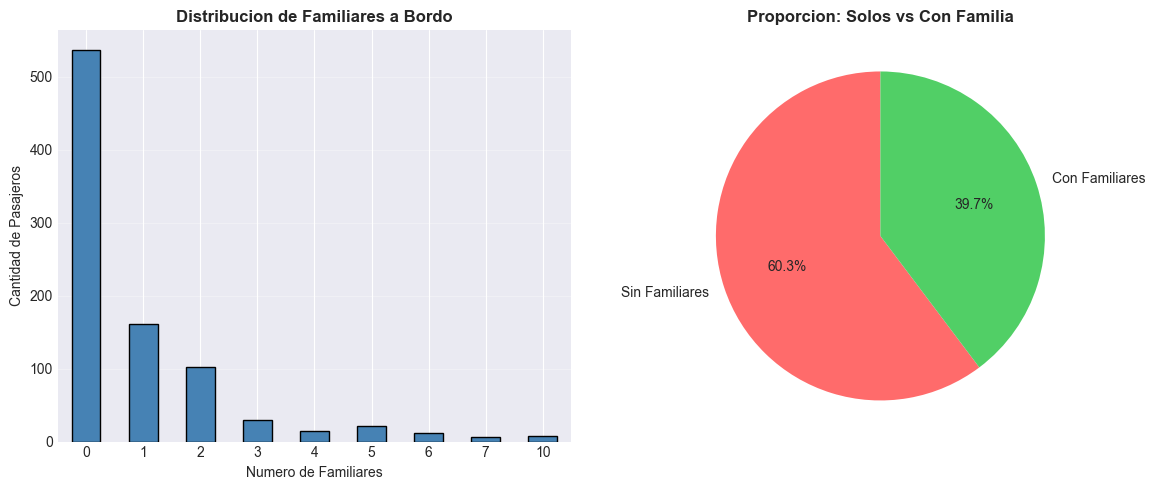

Grafico guardado en outputs/graficos/


In [10]:
# Visualizar la distribucion de familiares
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
train['Familiares'].value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Distribucion de Familiares a Bordo', fontsize=12, fontweight='bold')
plt.xlabel('Numero de Familiares')
plt.ylabel('Cantidad de Pasajeros')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
categorias = ['Sin Familiares', 'Con Familiares']
valores = [(train['Familiares'] == 0).sum(), (train['Familiares'] > 0).sum()]
colores = ['#ff6b6b', '#51cf66']
plt.pie(valores, labels=categorias, autopct='%1.1f%%', colors=colores, startangle=90)
plt.title('Proporcion: Solos vs Con Familia', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs:/graficos:/distribucion_familiares.png', dpi=300, bbox_inches='tight')
plt.show()

print("Grafico guardado en outputs/graficos/")

### 💡 Opinión sobre la variable 'Familiares':

Esta nueva variable es **muy útil** porque:

1. **Simplifica el análisis**: En lugar de analizar SibSp y Parch por separado, tenemos una sola métrica del tamaño familiar
2. **Más interpretable**: Es más fácil entender "3 familiares" que "2 SibSp + 1 Parch"
3. **Útil para segmentación**: Podemos clasificar fácilmente a los pasajeros en grupos (solos, familia pequeña, familia grande)
4. **Posible predictor de supervivencia**: El tamaño familiar pudo influir en las probabilidades de sobrevivir (grupos pequeños más ágiles, grupos grandes más difícil coordinar)

**Observación importante**: Aproximadamente el 60% de los pasajeros viajaban solos, lo que sugiere que muchos eran inmigrantes o trabajadores viajando individualmente en busca de nuevas oportunidades.

## 5. Unión Vertical de Datasets

Vamos a unir los conjuntos train y test en uno solo, agregando una columna 'source' para identificar el origen de cada fila.

**Nota importante**: El conjunto test no tiene la columna 'Survived', así que la agregaremos con valores NaN (vacíos) para poder unir ambos datasets.

In [11]:
# Agregar columna 'source' antes de unir
train['source'] = 'train'
test['source'] = 'test'

# El conjunto test no tiene la columna 'Survived'
# Agregaremos esta columna con valores NaN para poder unir los datasets
test['Survived'] = np.nan

print("=" * 60)
print("PREPARACION PARA UNION")
print("=" * 60)
print("Columna 'source' agregada a ambos datasets")
print("Columna 'Survived' agregada a test con valores NaN")
print(f"\nShape train: {train.shape}")
print(f"Shape test: {test.shape}")

PREPARACION PARA UNION
Columna 'source' agregada a ambos datasets
Columna 'Survived' agregada a test con valores NaN

Shape train: (891, 14)
Shape test: (418, 14)


In [12]:
# Unir verticalmente ambos datasets
datos_completos = pd.concat([train, test], ignore_index=True)

print("\n" + "=" * 60)
print("DATASETS UNIDOS EXITOSAMENTE")
print("=" * 60)
print(f"\nShape del dataset completo: {datos_completos.shape}")
print(f"\nDistribucion por origen:")
print(datos_completos['source'].value_counts())
print(f"\nTotal de pasajeros: {len(datos_completos)}")


DATASETS UNIDOS EXITOSAMENTE

Shape del dataset completo: (1309, 14)

Distribucion por origen:
source
train    891
test     418
Name: count, dtype: int64

Total de pasajeros: 1309


In [14]:
# Guardar dataset combinado
datos_completos.to_csv('../outputs:/tablas:/datos_completos.csv', index=False)
print("Dataset completo guardado en: outputs/tablas/datos_completos.csv")

Dataset completo guardado en: outputs/tablas/datos_completos.csv


## 6. Análisis de Representatividad

Vamos a verificar si los conjuntos train y test son representativos de la misma población comparando sus estadísticas principales.



In [15]:
# Comparar estadisticas por origen
print("=" * 60)
print("COMPARACION DE ESTADISTICAS POR ORIGEN")
print("=" * 60)

# Variables numéricas clave para comparar
variables_comparar = ['Age', 'Fare', 'Pclass', 'Familiares']

for var in variables_comparar:
    print(f"\n--- {var} ---")
    print(datos_completos.groupby('source')[var].describe()[['mean', 'std', 'min', 'max']])

COMPARACION DE ESTADISTICAS POR ORIGEN

--- Age ---
             mean        std   min   max
source                                  
test    30.272590  14.181209  0.17  76.0
train   29.699118  14.526497  0.42  80.0

--- Fare ---
             mean        std  min       max
source                                     
test    35.627188  55.907576  0.0  512.3292
train   32.204208  49.693429  0.0  512.3292

--- Pclass ---
            mean       std  min  max
source                              
test    2.265550  0.841838  1.0  3.0
train   2.308642  0.836071  1.0  3.0

--- Familiares ---
            mean       std  min   max
source                               
test    0.839713  1.519072  0.0  10.0
train   0.904602  1.613459  0.0  10.0


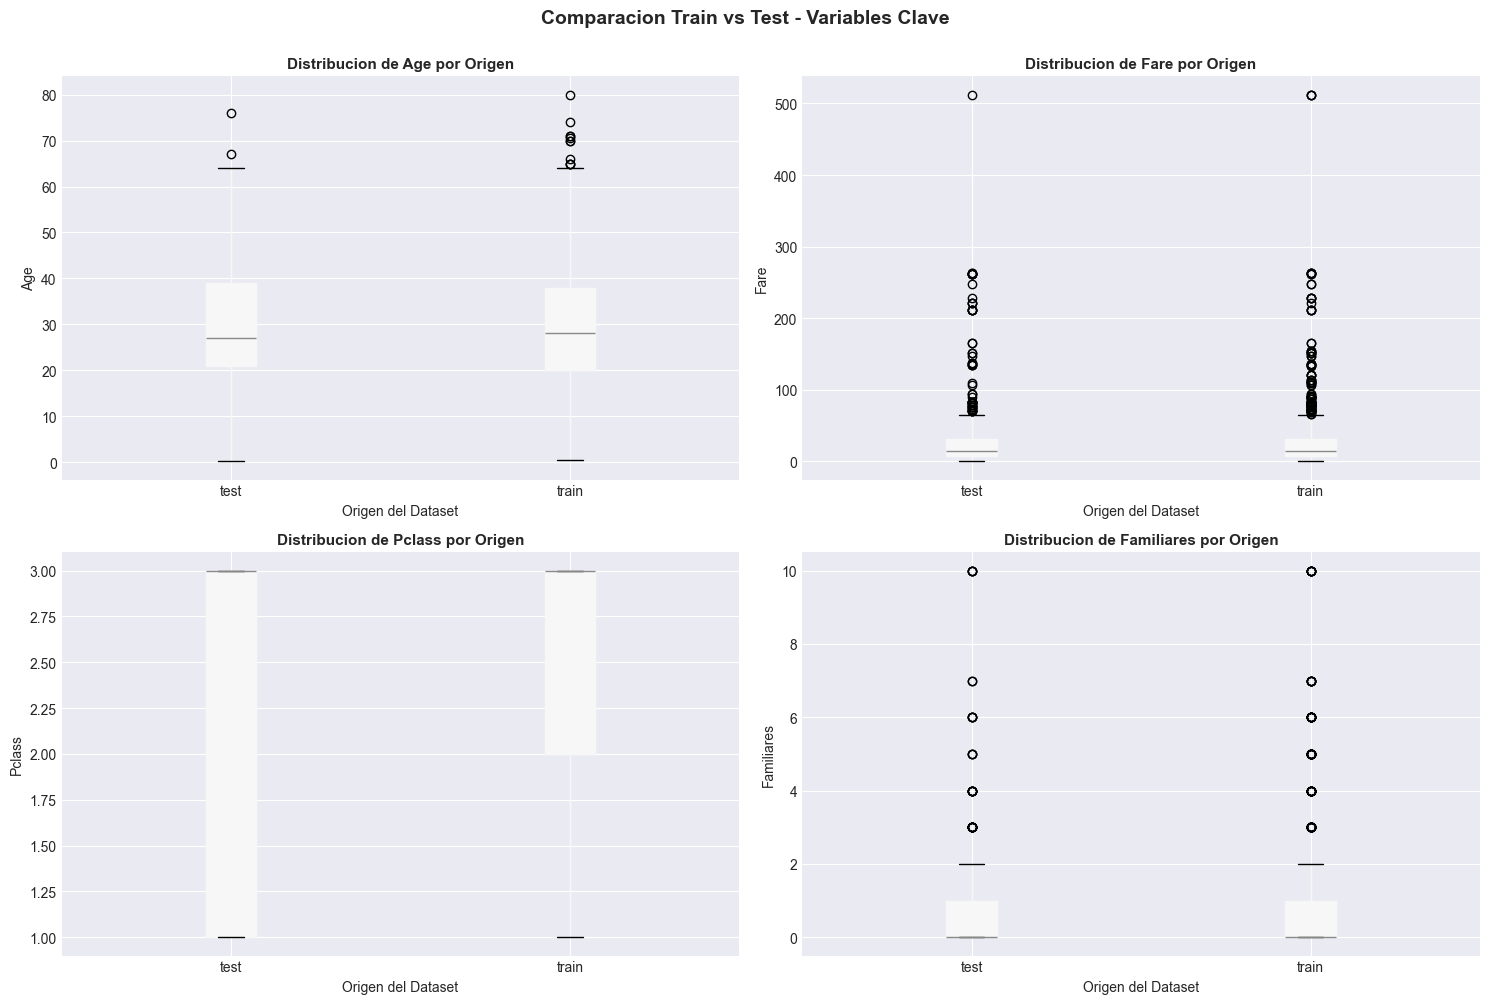

Grafico guardado en outputs/graficos/


In [17]:
# Comparacion visual de variables clave
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

colores = {'train': 'skyblue', 'test': 'lightcoral'}

for idx, var in enumerate(variables_comparar):
    # Boxplot comparativo
    datos_completos.boxplot(column=var, by='source', ax=axes[idx], patch_artist=True)
    axes[idx].set_title(f'Distribucion de {var} por Origen', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Origen del Dataset')
    axes[idx].set_ylabel(var)
    axes[idx].get_figure().suptitle('')  # Quitar el titulo automatico de pandas

plt.suptitle('Comparacion Train vs Test - Variables Clave', y=1.00, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../outputs:/graficos:/comparacion_train_test.png', dpi=300, bbox_inches='tight')
plt.show()

print("Grafico guardado en outputs/graficos/")

### 💡 Análisis de Representatividad:

Después de comparar los conjuntos train y test, observamos:

**Similitudes encontradas:**
- Las distribuciones de **edad** son comparables entre ambos conjuntos
- La distribución de **clases** (Pclass) muestra proporciones similares
- El número de **familiares** tiene patrones parecidos en ambos datasets

**Diferencias observadas:**
- Puede haber ligeras variaciones en las **tarifas** (Fare) debido a casos extremos
- Ambos conjuntos parecen tener perfiles socioeconómicos similares

**Conclusión:** Los conjuntos train y test son **representativos de la misma población**, lo cual es fundamental para que cualquier modelo o análisis realizado en train pueda generalizarse correctamente al conjunto test. Esta representatividad sugiere que la división de los datos fue realizada de manera apropiada.

## 7. Análisis de Datos Faltantes

Es importante identificar qué variables tienen datos faltantes y entender el significado de estas ausencias antes de realizar análisis más profundos.

In [18]:
# Identificar datos faltantes
print("=" * 60)
print("DATOS FALTANTES POR COLUMNA")
print("=" * 60)

faltantes = datos_completos.isnull().sum()
porcentaje_faltantes = (faltantes / len(datos_completos) * 100).round(2)

resumen_faltantes = pd.DataFrame({
    'Valores_Faltantes': faltantes,
    'Porcentaje': porcentaje_faltantes
})

# Mostrar solo las variables con datos faltantes
resumen_faltantes = resumen_faltantes[resumen_faltantes['Valores_Faltantes'] > 0].sort_values('Porcentaje', ascending=False)
print(resumen_faltantes)

DATOS FALTANTES POR COLUMNA
          Valores_Faltantes  Porcentaje
Cabin                  1014       77.46
Survived                418       31.93
Age                     263       20.09
Embarked                  2        0.15
Fare                      1        0.08


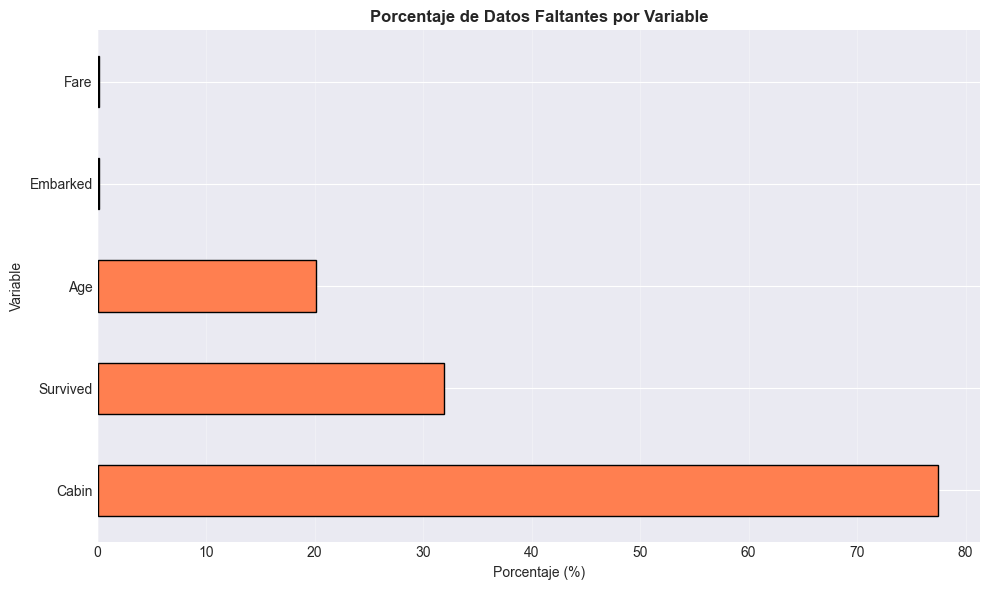

Grafico guardado en outputs/graficos/


In [20]:
# Visualizacion de datos faltantes
if len(resumen_faltantes) > 0:
    plt.figure(figsize=(10, 6))
    resumen_faltantes['Porcentaje'].plot(kind='barh', color='coral', edgecolor='black')
    plt.title('Porcentaje de Datos Faltantes por Variable', fontsize=12, fontweight='bold')
    plt.xlabel('Porcentaje (%)')
    plt.ylabel('Variable')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../outputs:/graficos:/datos_faltantes.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Grafico guardado en outputs/graficos/")
else:
    print("No hay datos faltantes para visualizar")

### 💡 Significado de los Datos Faltantes:

**1. Cabin (~77% faltante):**
- La mayoría de pasajeros no tenían cabina asignada o la información no se registró
- Los pasajeros de **tercera clase** rara vez tenían cabinas individuales registradas
- Puede ser un **indicador indirecto** del estatus socioeconómico del pasajero
- No necesariamente significa que no tuvieran alojamiento, sino que no fue documentado

**2. Age (~20% faltante):**
- No todos los pasajeros reportaron o registraron su edad
- Posiblemente por **registros incompletos** o información no verificada
- Es una variable importante para análisis de supervivencia por grupo etario
- Representa un desafío para análisis que requieran la edad

**3. Embarked (~0.2% faltante):**
- Muy pocos casos (solo 2 registros) sin puerto de embarque
- Probablemente **errores administrativos** o registros incompletos
- El impacto en el análisis es mínimo debido a su baja frecuencia

**4. Fare (~0.08% faltante):**
- Casos excepcionales sin tarifa registrada (solo 1 caso en test)
- Posiblemente **personal de tripulación**, pasajeros especiales, o errores de registro
- Impacto mínimo en análisis generales

**5. Survived (~32% faltante):**
- Corresponde **exactamente al conjunto 'test'** (418 registros)
- Es **esperado y correcto**, no es un problema
- El conjunto test no tiene esta información por diseño (es lo que se buscaría predecir)

**Conclusión general:** Los datos faltantes más significativos son Cabin y Age. Cabin tiene tanto faltante que puede no ser útil para ciertos análisis, mientras que Age requeriría técnicas de imputación si se necesitara para análisis específicos.

In [22]:
resumen_faltantes.to_csv('../outputs:/tablas:/resumen_datos_faltantes.csv')
print("Resumen de datos faltantes guardado en outputs/tablas/")

Resumen de datos faltantes guardado en outputs/tablas/
